# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [8]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size. 


In [ ]:
def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities  
    
    Arguments:
    ----------
    probability_dict:
      - keys: symbol as character or string
      - values: probability of the symbol as a float or double
      Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}
    
    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword 
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    
    """  

### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course. 

In [ ]:

def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols  
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    
    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized adress with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """

### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [ ]:
def LZ77(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - encoded_sequence : the encoded sequence in the string format
    """

In [ ]:
# [Locked Cell] Evaluation of your functions by the examiner. 
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


In [ ]:
# Write here your codes for questions 5 to 15 (you may delete this comment)

## Channel coding

In [9]:
# Write here your codes for questions 16 to 21 (you may delete this comment)
# From here, you may import either opencv (cv2) or the Python Imaging Library (PIL), but no other extra libraries.
import cv2

# TO REMOVE before submit
%matplotlib inline
from matplotlib import pyplot as plt

### Question 16

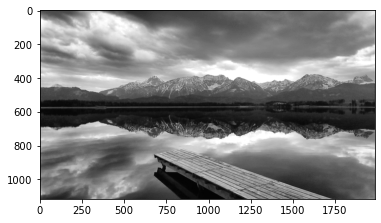

Image height = 1116px
Image width = 1984px


In [21]:
"""
Read image located at path and show it.
Parameters:
    - path: Path to the image.
Return:
Image that has been read.
"""
def read_and_show_img(path: str):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # For test - TO REMOVE
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()
    ''' CODE FOR SUBMIT
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    '''
    return image
image = read_and_show_img("data/image.png")
print("Image height = " + str(len(image)) + "px")
print("Image width = " + str(len(image[0])) + "px")

### Question 17

In [22]:
"""
Encode the image signal using a fixed-length binary code.
Parameters:
    - image: Image to encode.
Return:
List of strings where each string is the binary representation of a pixel from left to right and top to bottom.
"""
def encodeImage(image) -> list:
    encoded = []
    for row in image:
        for pixel in row:
            encoded.append(np.binary_repr(pixel, width=8)) # 8 because log_2(256) = 8

    return encoded

imageSignal = encodeImage(image)

### Question 18

Working on pixel 0
Working on pixel 100000
Working on pixel 200000
Working on pixel 300000
Working on pixel 400000
Working on pixel 500000
Working on pixel 600000
Working on pixel 700000
Working on pixel 800000
Working on pixel 900000
Working on pixel 1000000
Working on pixel 1100000
Working on pixel 1200000
Working on pixel 1300000
Working on pixel 1400000
Working on pixel 1500000
Working on pixel 1600000
Working on pixel 1700000
Working on pixel 1800000
Working on pixel 1900000
Working on pixel 2000000
Working on pixel 2100000
Working on pixel 2200000
True


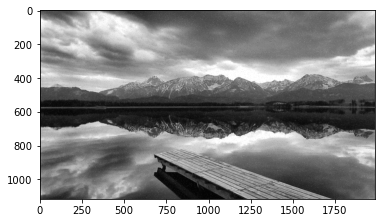

array([[ 78,  81,  83, ..., 228, 234, 238],
       [ 79,  81,  82, ..., 228, 233, 237],
       [ 81,  81,  81, ..., 227, 232, 236],
       ...,
       [ 70,  68,  65, ..., 139, 115,  92],
       [ 67,  65,  63, ..., 141, 118,  95],
       [ 64,  63,  62, ..., 142, 120,  96]], dtype=uint8)

In [27]:
# Simulate the channel effect on the binary image signal
ERROR_RATE = 0.01

# Simulate potential errors
imageAfterChannel = []
for pixel in imageSignal:
    px = ""
    for bit in pixel:
        if np.random.uniform(0.0, 1.0, 1) <= ERROR_RATE:
            if bit == '1':
                px+='0'
            else:
                px+='1'
        else:
            px+=bit
    imageAfterChannel.append(px)

# Save image
print(len(imageAfterChannel) == len(image)*len(image[0]))
imageAfter = image.copy()
rowIndex = 0
colIndex = 0
height = len(image)
width = len(image[0])
for pixel in imageAfterChannel:
    imageAfter[rowIndex][colIndex] = int(pixel, 2)
    colIndex+=1
    if colIndex >= width:
        colIndex = 0
        rowIndex+=1
cv2.imwrite("q18.png", imageAfter)

# Show image
read_and_show_img("q18.png")